# Multi-path exploration

In [2]:
import sys
sys.path.append('../')
from panav.viz import draw_env
from panav.multi_path import explore_multi_path
from panav.env import NavigationEnv,box_2d_center,Box2DRegion

import numpy as np
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

# Empty Environment

In [3]:

# 2D navigation environment

start_box_side = np.array([1,1])
goal_box_side = np.array([1,1])

top, bottom = 9,-9
start_x_offset = 7
goal_x_offset = 9
N = 4

start_locs = np.vstack([
np.vstack([np.ones(N)*start_x_offset,np.linspace(top,bottom, N)]).T,
np.vstack([np.ones(N)*(-start_x_offset),np.linspace(top,bottom, N)]).T])

goal_locs = np.vstack([
np.vstack([np.ones(N)*(-goal_x_offset),np.linspace(bottom,top, N)]).T,
np.vstack([np.ones(N)*goal_x_offset,np.linspace(bottom,top, N)]).T])


starts = [box_2d_center(s,start_box_side) for s in start_locs]
goals = [box_2d_center(g,goal_box_side) for g in goal_locs]

start = np.array(list(starts[0].centroid().coords)[0])
goal = np.array(list(goals[0].centroid().coords)[0])

limits = [(-10.0,10.0),(-10.0,10.0)]

# Construct the hybrid graph representation of the environment
bloating_r = 0.5 
env = NavigationEnv(limits,[],starts,goals)

# Single Tunnel

In [4]:

O1 = Box2DRegion((-2.5,2.5),(0.5,10))
O2 = Box2DRegion((-2.5,2.5),(-10,-1.0))
env = NavigationEnv(limits,[O1,O2],starts,goals)

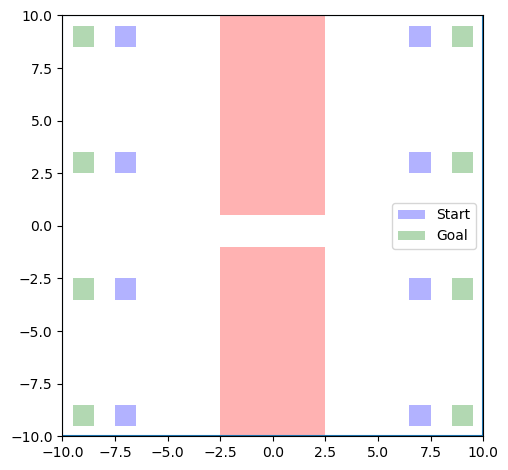

In [6]:
ax = plt.gca()
draw_env(env,[], ax)
plt.tight_layout()
plt.show()    


In [20]:
p = Tube_Planning(env,start, goal, vmax , bloating_r, 
            obs_trajectories=[], 
            d=d, K=K,
            ignore_finished_agents = False)

In [24]:
from panav.PBS.conflict import plan_obs_conflict
def lazy_optim(planner, env, start, goal, obstacle_trajectories):
    active = []
    m = len(obstacle_trajectories)

    i = 0
    while True:
        print("num obstacle trajectories:{}/{}".format(i,m))
        p = planner(env,start,goal,active)
        conflicted_obs = plan_obs_conflict(p, obstacle_trajectories, bloating_r)
        if not conflicted_obs:
            return p
        active.append(conflicted_obs)
        
        i+=1
        if i>m:
            break

    return None

from panav.SAMP import Tube_Planning
from panav.util import unique_tx
from time import time
from functools import partial
agents = set(np.arange(len(env.starts)))

vmax = 1.0
d = 2

plan = []
times = []
success = True
fail_time = None
for agent in agents:
    print(agent)

    t0 = time()
    
    start = env.starts[agent]
    goal = env.goals[agent]

    agent_success = False
    
    
    for K in [2,3,5,6,7,8,9]:
       
        if results is not None:
            t,xs = results
            times.append(time()-t0)
            print(times[-1])
            t,xs = unique_tx(t,xs)
            plan.append((t,xs))
            agent_success = True
            break
        

    if not agent_success:
        print("Solution failed.")
        success = False
        times.append(time()-t0)
        break



0
K 2
num obstacle trajectories:0/0
K 3
num obstacle trajectories:0/0
0.022413015365600586
1
K 2
num obstacle trajectories:0/1
K 3
num obstacle trajectories:0/1
0.01891613006591797
2
K 2
num obstacle trajectories:0/2
K 3
num obstacle trajectories:0/2
num obstacle trajectories:1/2
0.04400300979614258
3
K 2
num obstacle trajectories:0/3
K 3
num obstacle trajectories:0/3
num obstacle trajectories:1/3
K 5
num obstacle trajectories:0/3
num obstacle trajectories:1/3
0.12108206748962402
4
K 2
num obstacle trajectories:0/4


/Users/tianpengzhang/Dropbox (Harvard University)/Tianpeng's research/Tianpeng & Lina/Multiagent Motion Planning/PA-Nav/notebooks_playground/../panav/PBS/conflict.py:70: RuntimeWarning: invalid value encountered in divide
  vb = (pb[:,1]-pb[:,0])/(tb[1]-tb[0])


K 3
num obstacle trajectories:0/4
num obstacle trajectories:1/4
num obstacle trajectories:2/4
K 5
num obstacle trajectories:0/4
num obstacle trajectories:1/4
num obstacle trajectories:2/4
num obstacle trajectories:3/4
1.303678035736084
5
K 2
num obstacle trajectories:0/5
K 3
num obstacle trajectories:0/5
num obstacle trajectories:1/5
num obstacle trajectories:2/5
K 5
num obstacle trajectories:0/5
num obstacle trajectories:1/5


/Users/tianpengzhang/Dropbox (Harvard University)/Tianpeng's research/Tianpeng & Lina/Multiagent Motion Planning/PA-Nav/notebooks_playground/../panav/PBS/conflict.py:70: RuntimeWarning: divide by zero encountered in divide
  vb = (pb[:,1]-pb[:,0])/(tb[1]-tb[0])
/Users/tianpengzhang/Dropbox (Harvard University)/Tianpeng's research/Tianpeng & Lina/Multiagent Motion Planning/PA-Nav/notebooks_playground/../panav/PBS/conflict.py:74: RuntimeWarning: invalid value encountered in multiply
  
/Users/tianpengzhang/Dropbox (Harvard University)/Tianpeng's research/Tianpeng & Lina/Multiagent Motion Planning/PA-Nav/notebooks_playground/../panav/PBS/conflict.py:81: RuntimeWarning: invalid value encountered in multiply
  or np.linalg.norm(u + ub * v)<= ra+rb
/Users/tianpengzhang/Dropbox (Harvard University)/Tianpeng's research/Tianpeng & Lina/Multiagent Motion Planning/PA-Nav/notebooks_playground/../panav/PBS/conflict.py:82: RuntimeWarning: invalid value encountered in multiply
  # The minimal distanc

num obstacle trajectories:2/5
num obstacle trajectories:3/5
num obstacle trajectories:4/5
3.646437168121338
6
K 2
num obstacle trajectories:0/6
K 3
num obstacle trajectories:0/6
num obstacle trajectories:1/6
num obstacle trajectories:2/6
K 5
num obstacle trajectories:0/6
num obstacle trajectories:1/6
num obstacle trajectories:2/6
num obstacle trajectories:3/6
num obstacle trajectories:4/6
num obstacle trajectories:5/6
num obstacle trajectories:6/6
K 6
num obstacle trajectories:0/6
num obstacle trajectories:1/6
num obstacle trajectories:2/6
num obstacle trajectories:3/6
num obstacle trajectories:4/6
num obstacle trajectories:5/6
num obstacle trajectories:6/6
21.1491801738739
7
K 2
num obstacle trajectories:0/7
K 3
num obstacle trajectories:0/7
num obstacle trajectories:1/7
num obstacle trajectories:2/7
K 5
num obstacle trajectories:0/7
num obstacle trajectories:1/7
num obstacle trajectories:2/7
num obstacle trajectories:3/7
num obstacle trajectories:4/7
num obstacle trajectories:5/7
num

SolverError: Solver 'GUROBI' failed. Try another solver, or solve with verbose=True for more information.

In [40]:
def lazy_optim(planner, env, start, goal, obstacle_trajectories):
    active = []
    m = len(obstacle_trajectories)

    i = 0
    while True:
        print("num obstacle trajectories:{}/{}".format(i,m))
        p = planner(env,start,goal,active)
        if p is None:
            print('Problem becomes infeasible.')
            break
        conflicted_obs = plan_obs_conflict(p, obstacle_trajectories, bloating_r)
        if not conflicted_obs:
            return p
        active.append(conflicted_obs)
        
        i+=1
        if i>m:
            break

    return None
K = 3
print("K",K)
planner = lambda env, start, goal, obs_trajectories: Tube_Planning(env,start, goal, vmax , bloating_r, 
                                                    obs_trajectories=obs_trajectories, 
                                                    d=d, K=K,
                                                    ignore_finished_agents = False)

results = lazy_optim(planner, env, start, goal, plan)

K 3
num obstacle trajectories:0/7
num obstacle trajectories:1/7
num obstacle trajectories:2/7
Problem becomes infeasible.
